# Libraries

In [96]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

# Import data 

In [52]:
df= pd.read_csv("segmentation data.csv",index_col=0)

# Explore the dataset

In [53]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [54]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate 

In [55]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


# Data Visualization

Text(0.5, 1.0, 'corr')

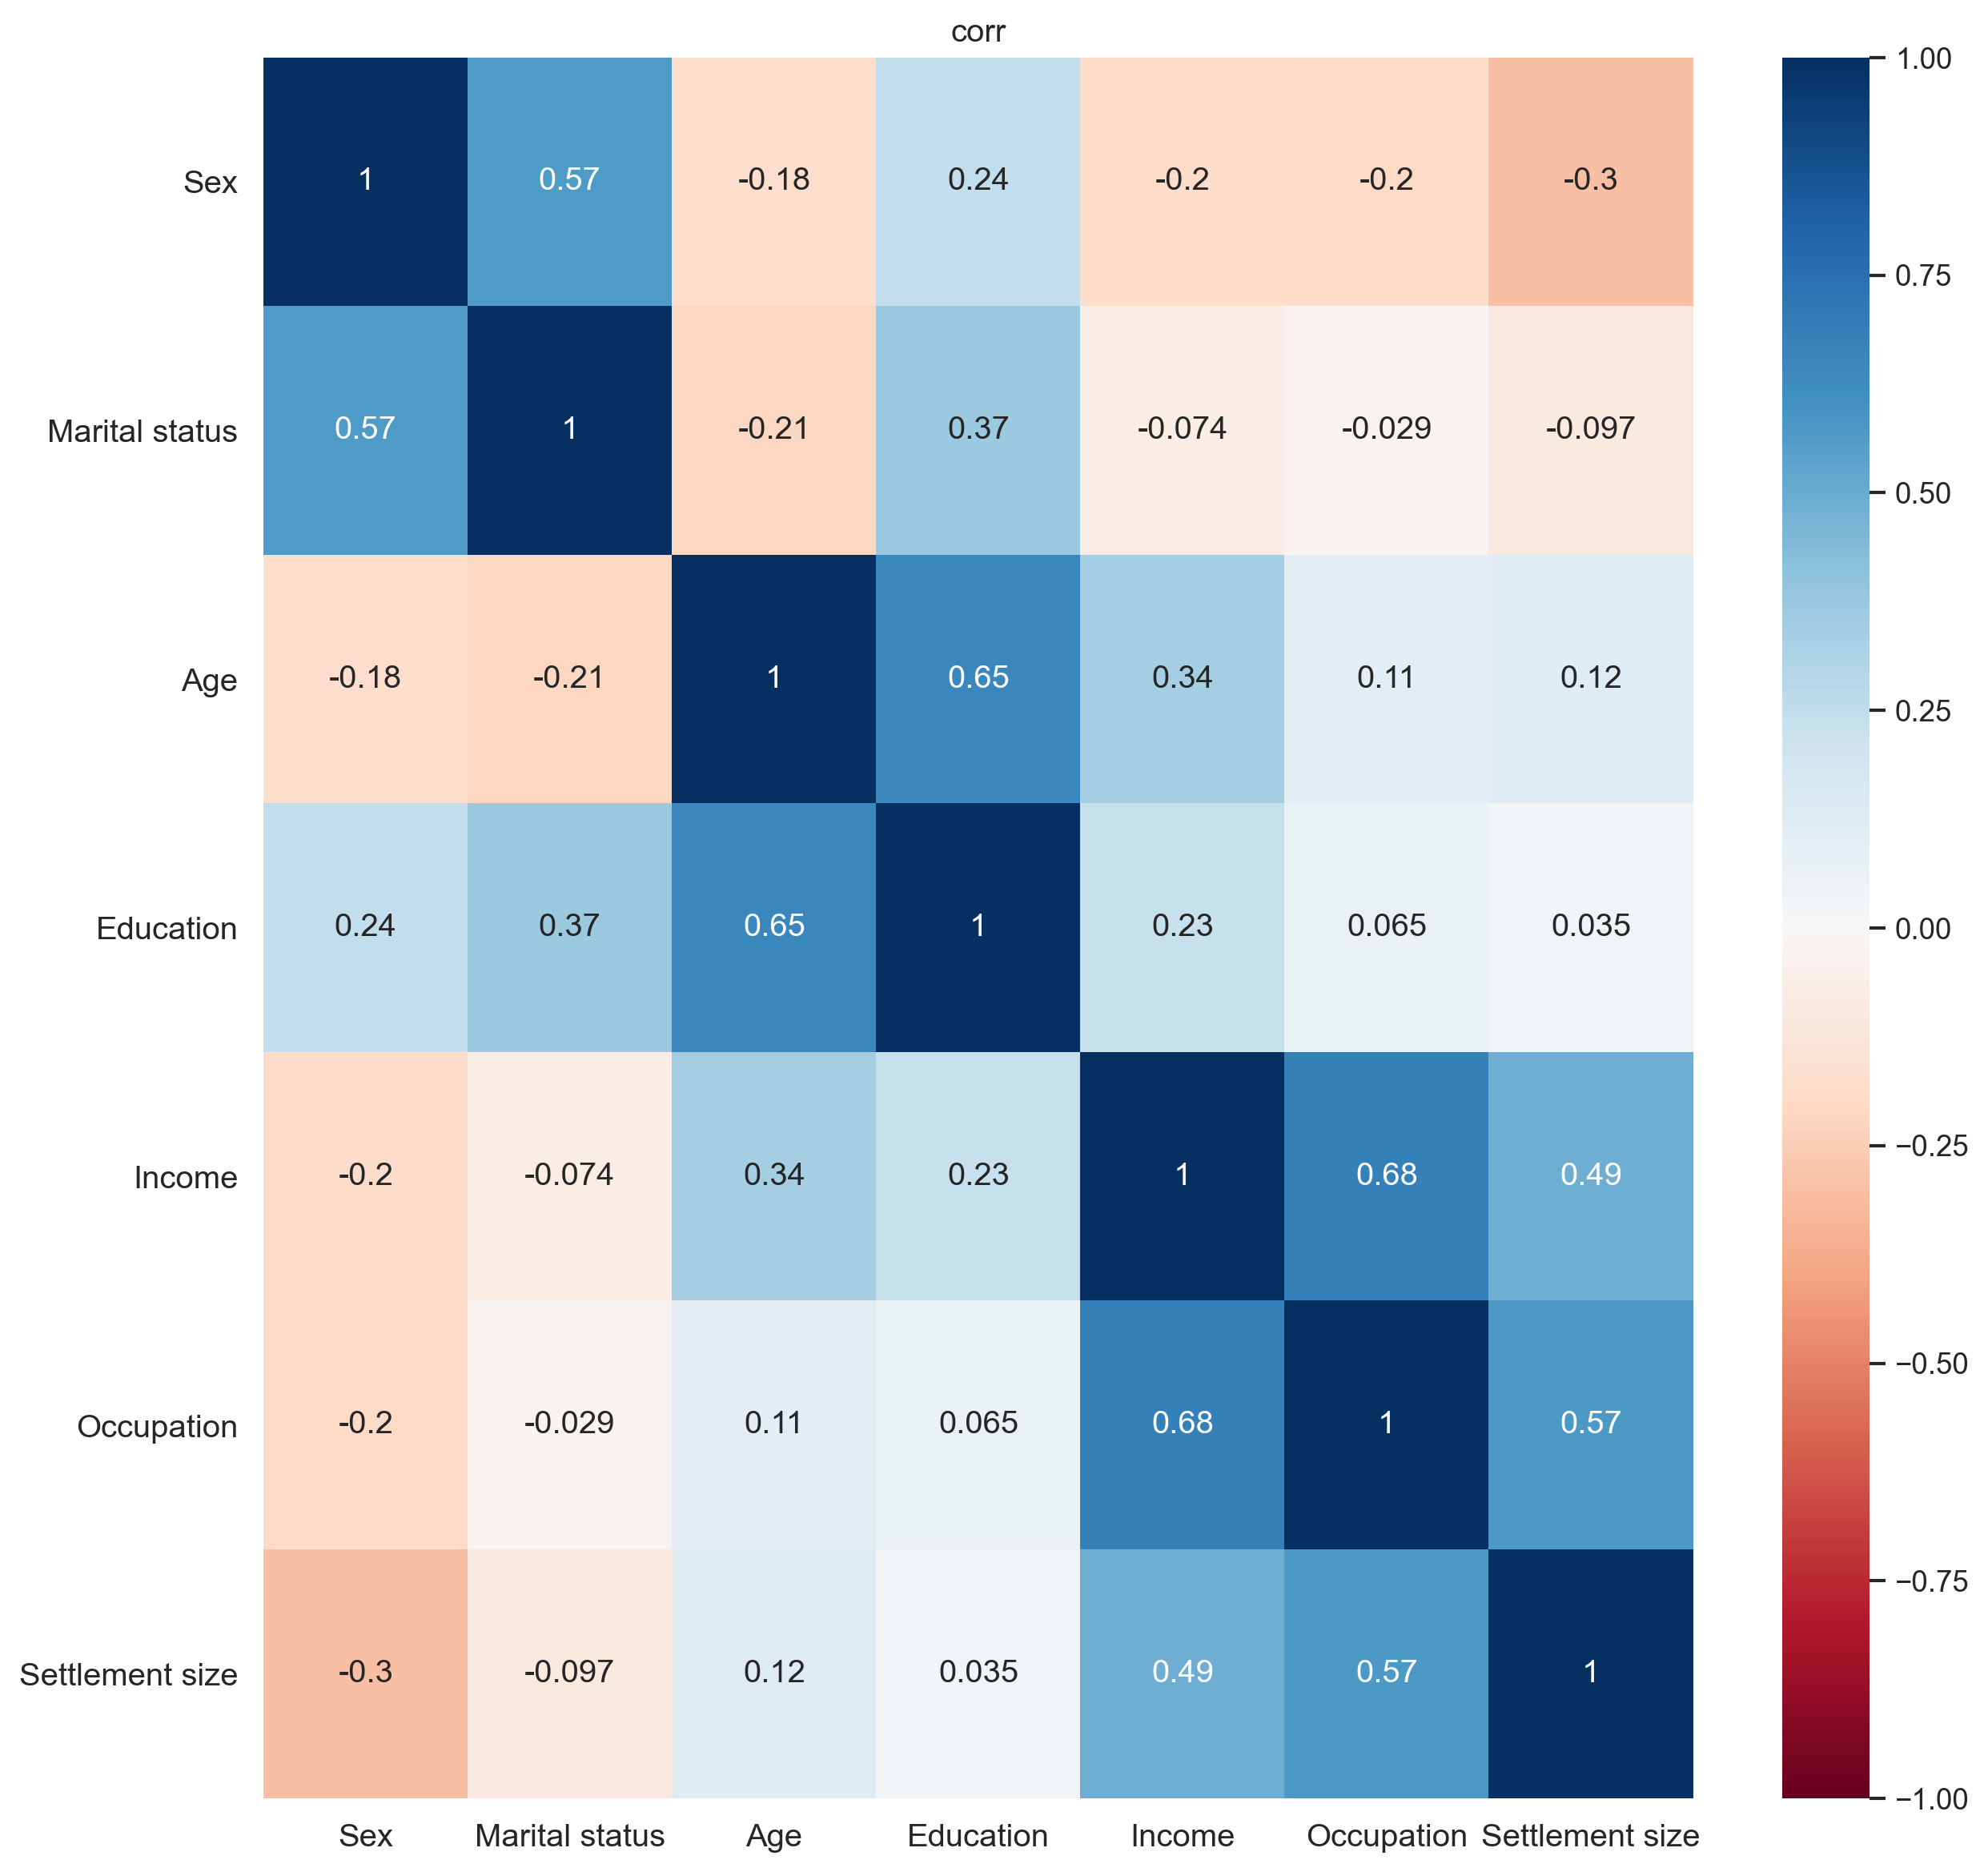

In [56]:
plt.figure(figsize = (12,12))
s = sns.heatmap(df.corr(),annot = True,cmap= 'RdBu',vmin = -1,vmax =1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize =12)
s.set_xticklabels(s.get_xticklabels(),rotation = 0,fontsize =12)
plt.title('corr')      

# Scatter plot

Text(0.5, 1.0, 'Visual')

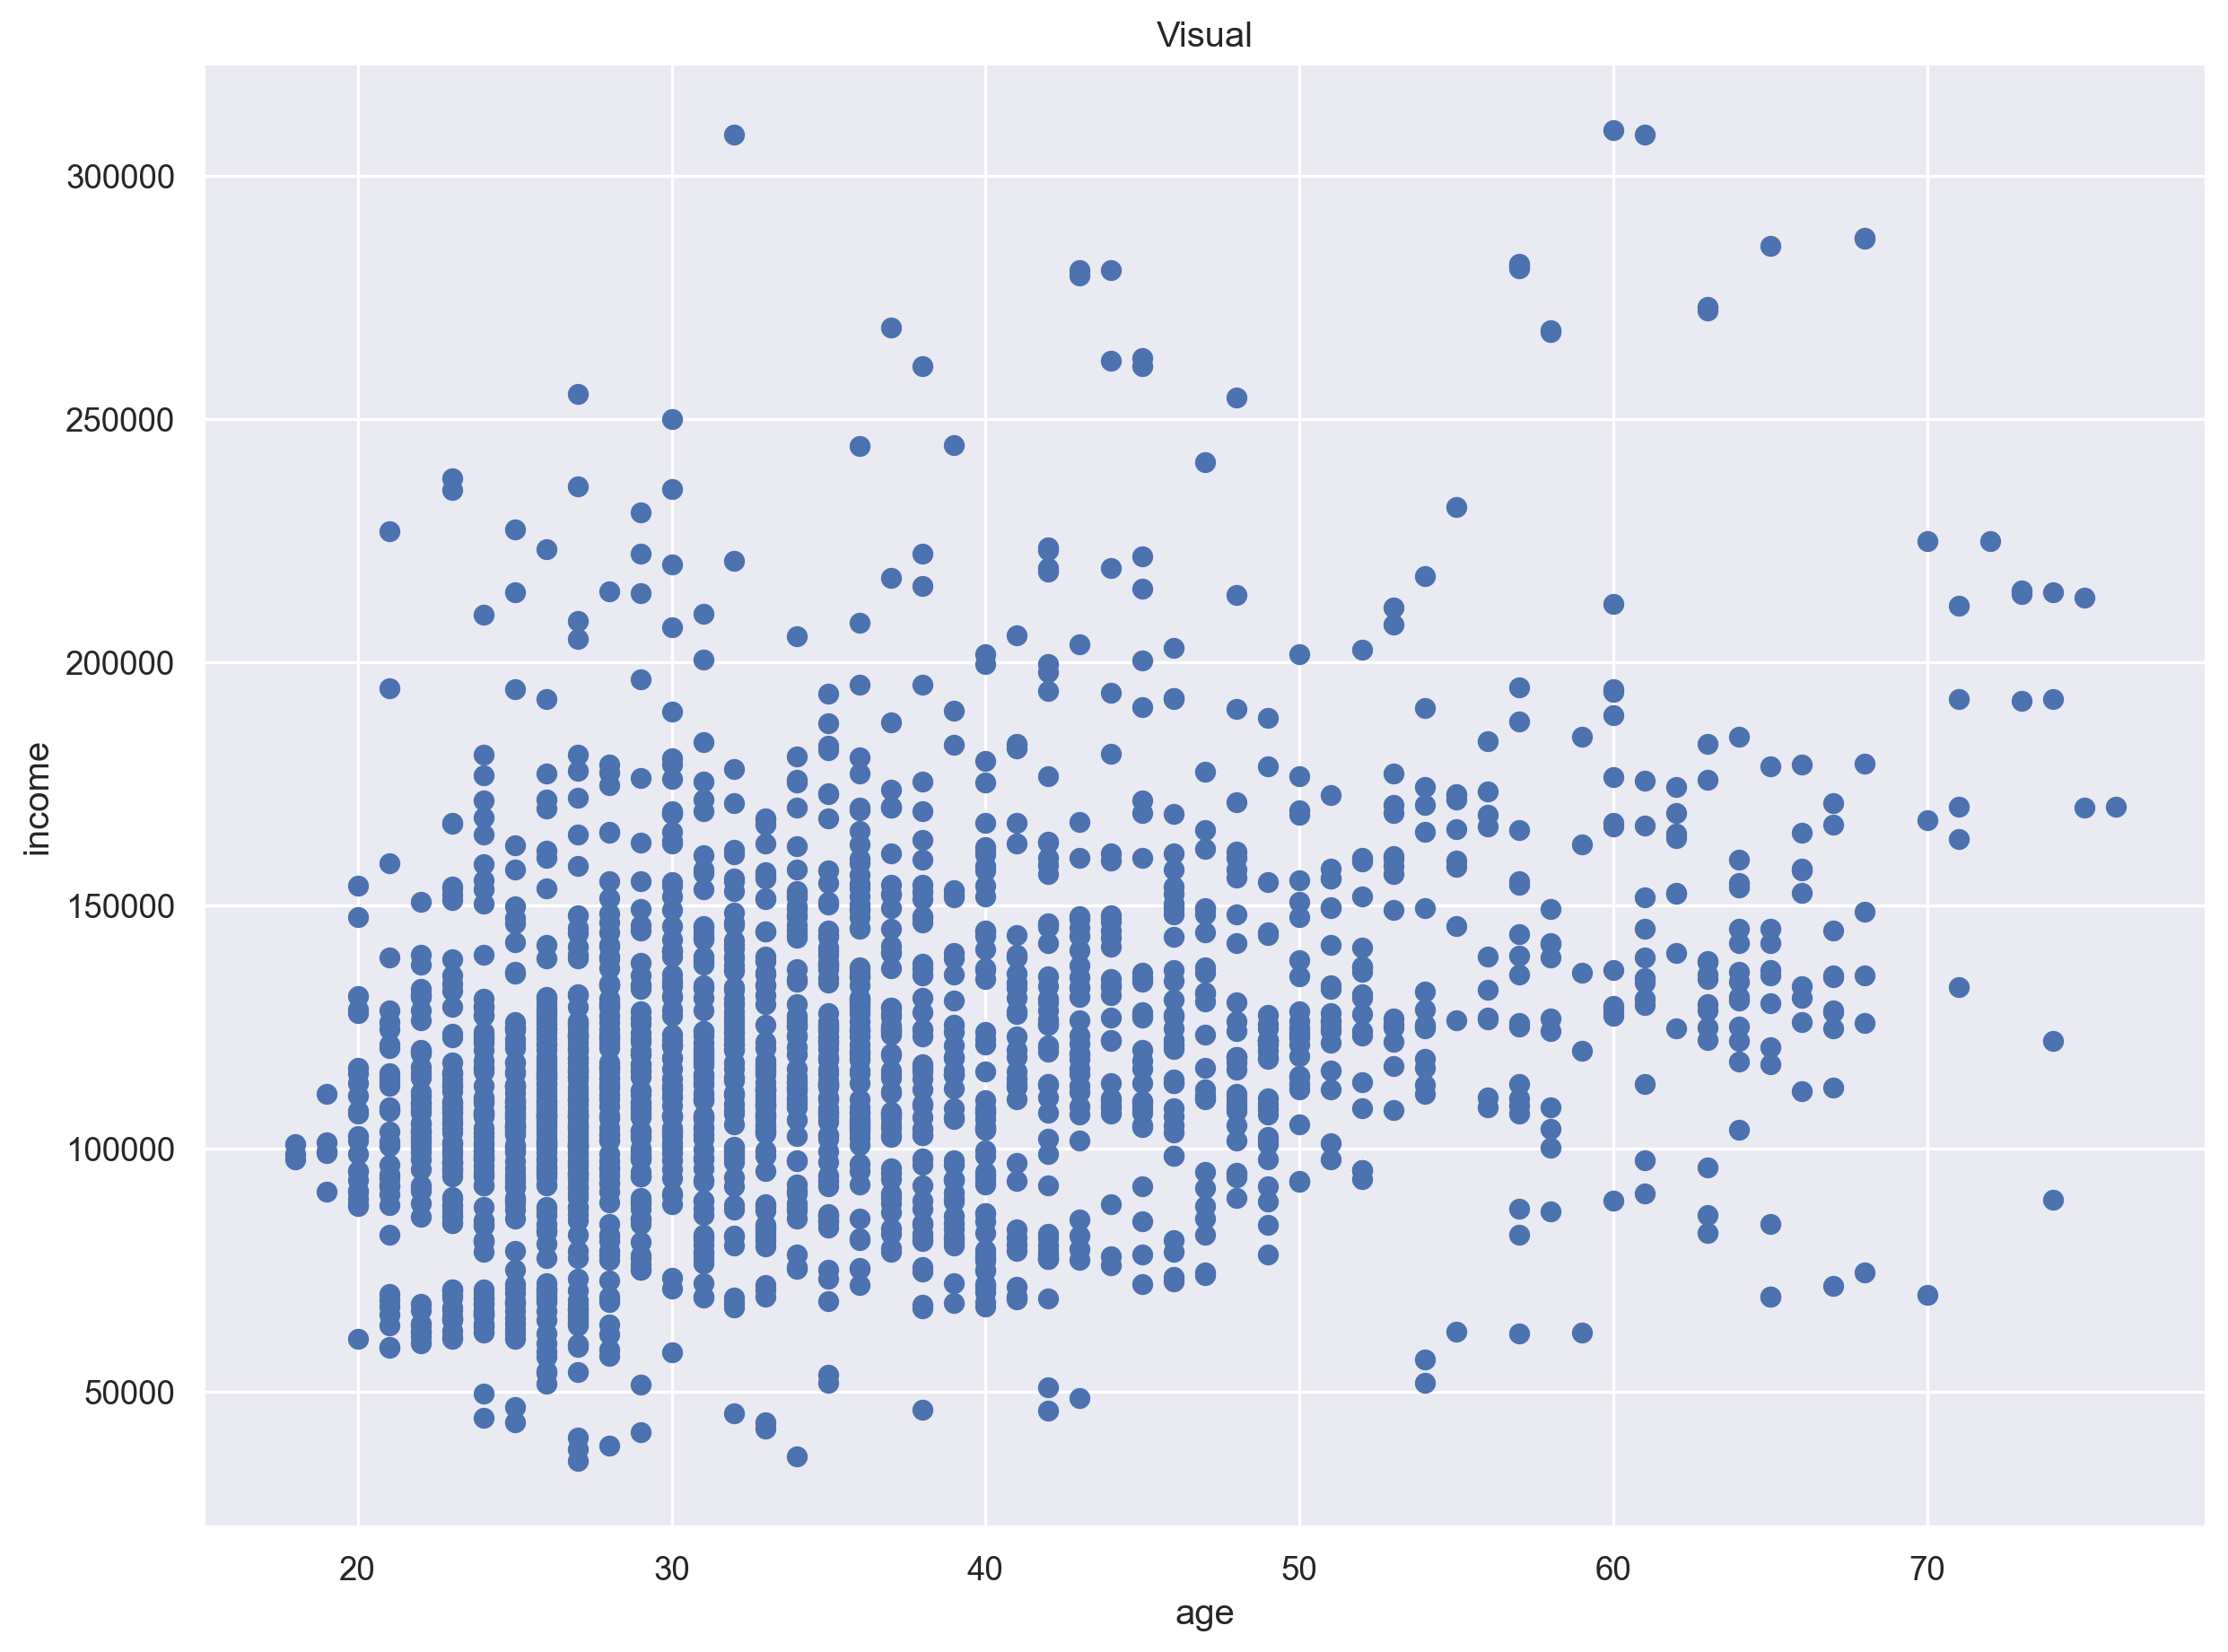

In [57]:
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('Visual')

# standardization

In [58]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

# Hierarchial clustering

In [59]:
hc = linkage(segmentation_std,method ='ward')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

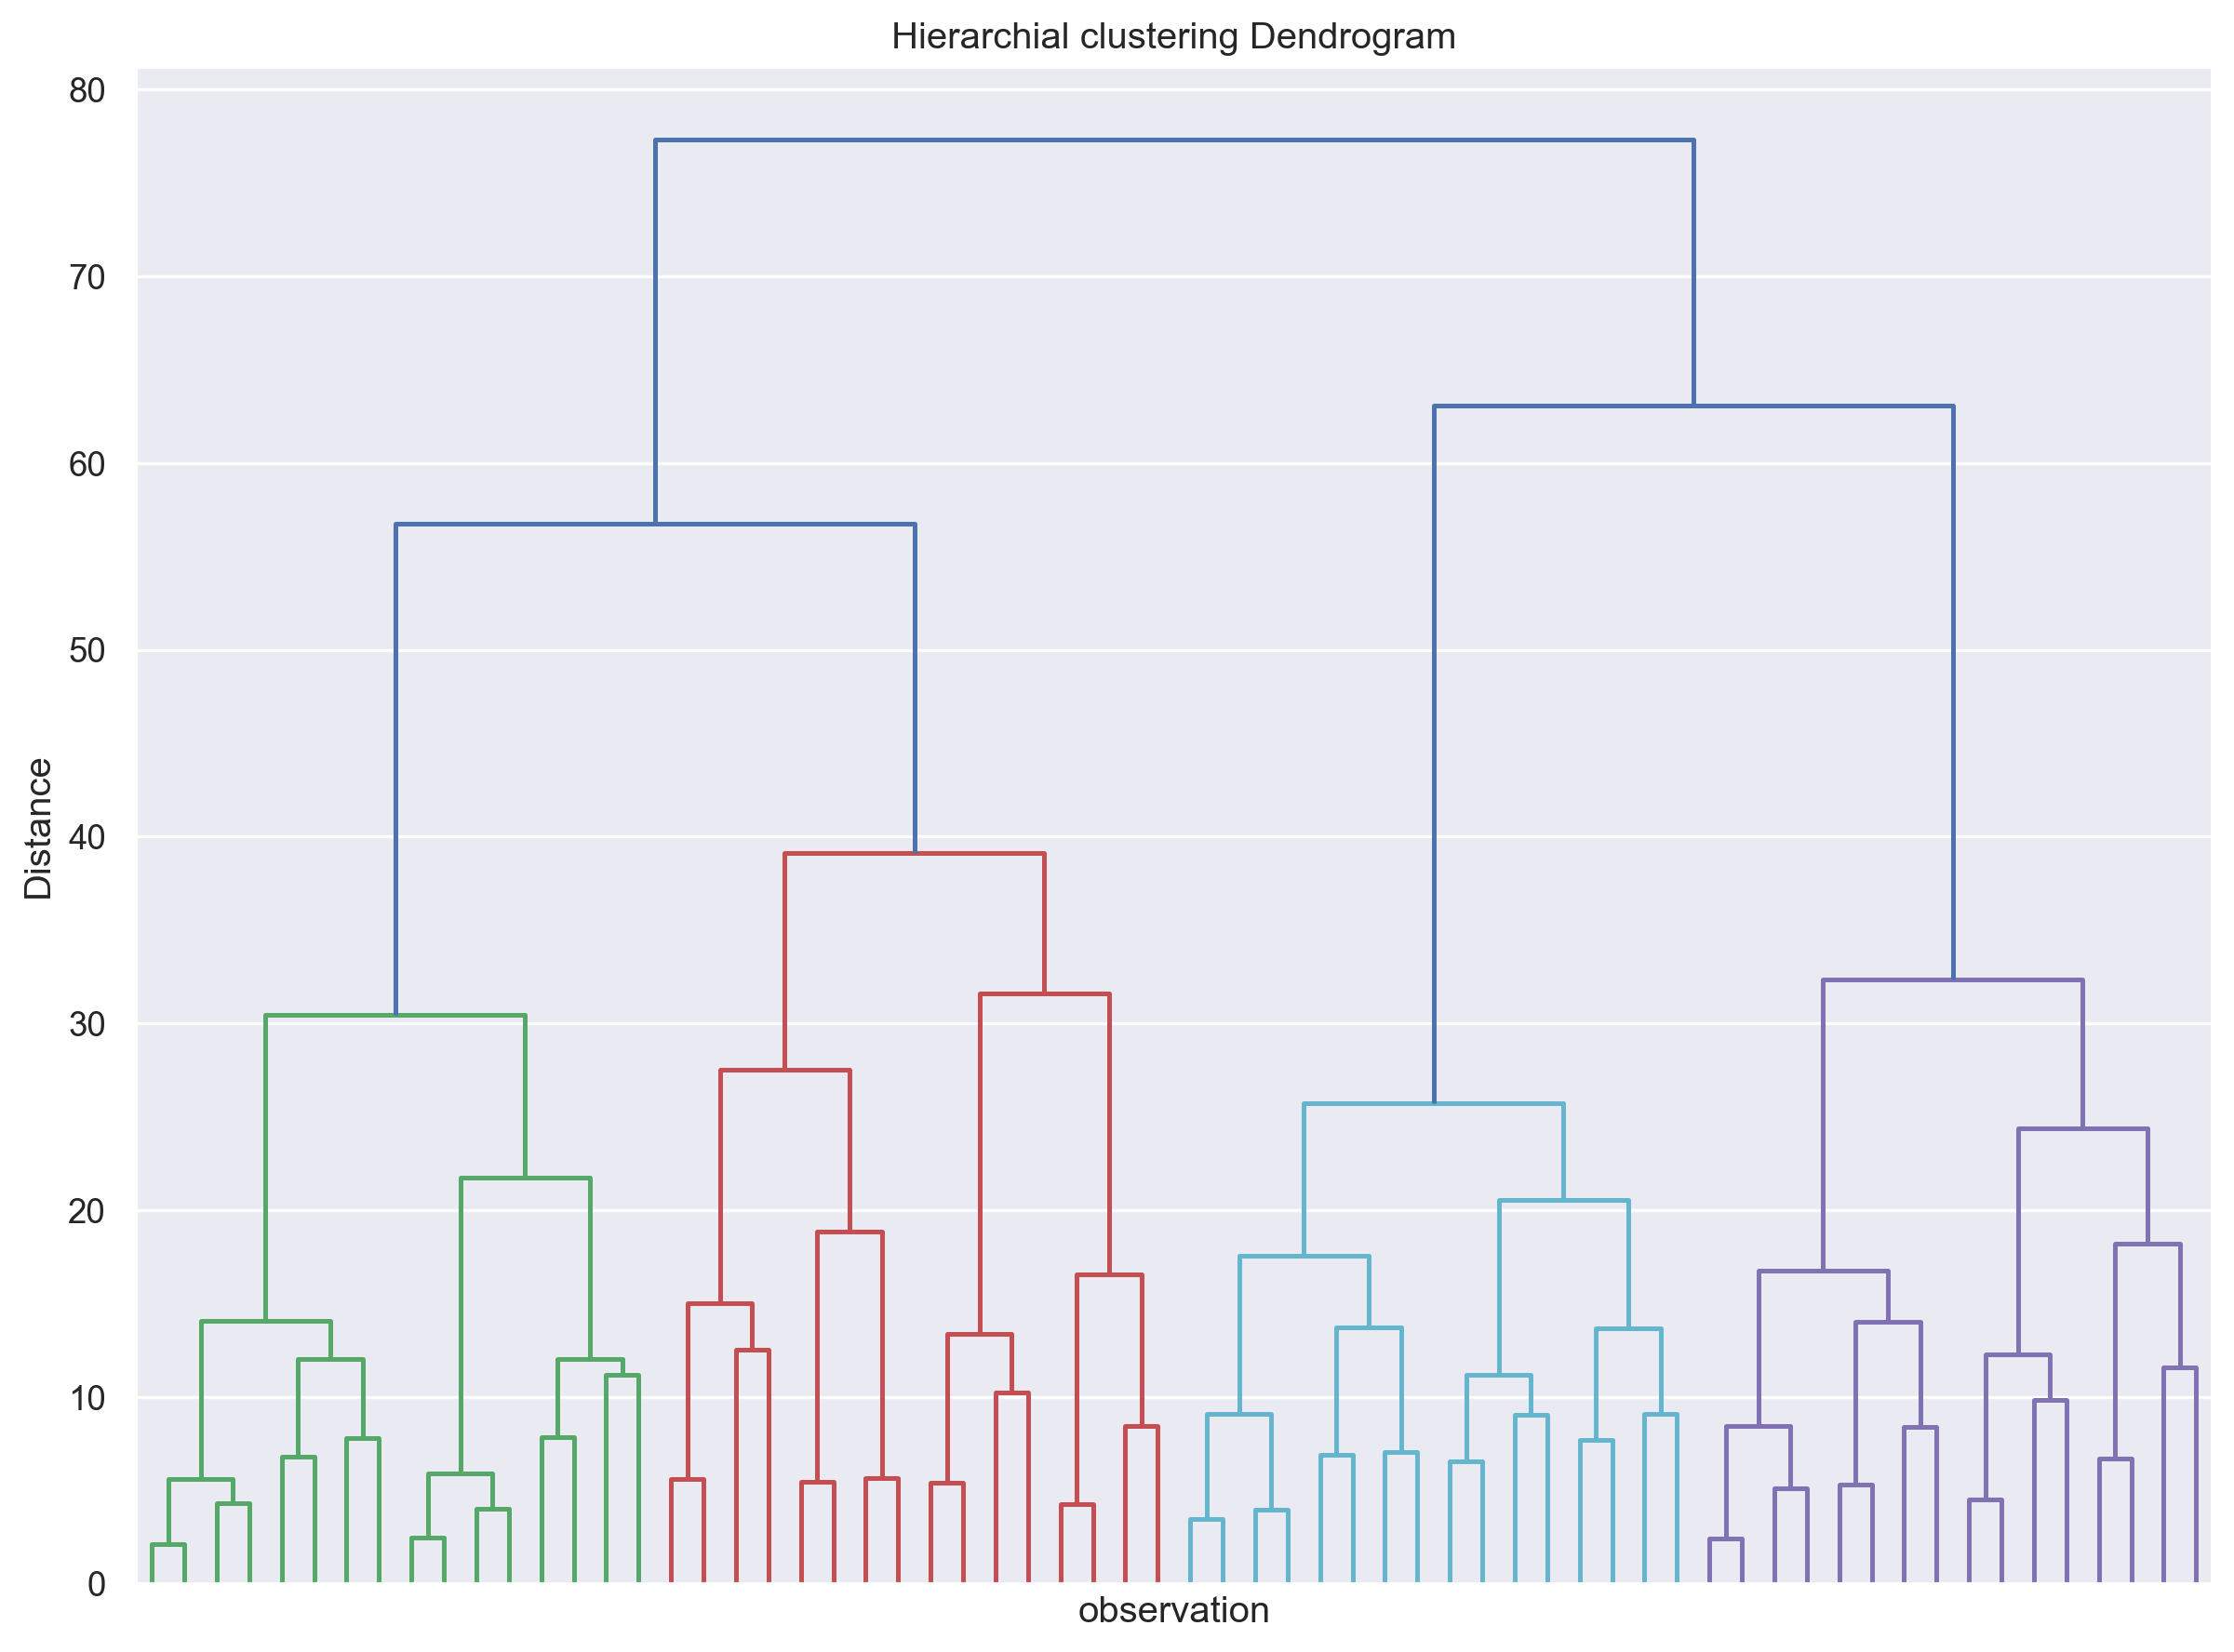

In [60]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial clustering Dendrogram')
plt.xlabel('observation')
plt.ylabel('Distance')
dendrogram(hc,truncate_mode = 'level',
           p= 5,
           show_leaf_counts = False,
           no_labels = True)
plt.plot

# k-mean clustering

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init= 'k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)
    

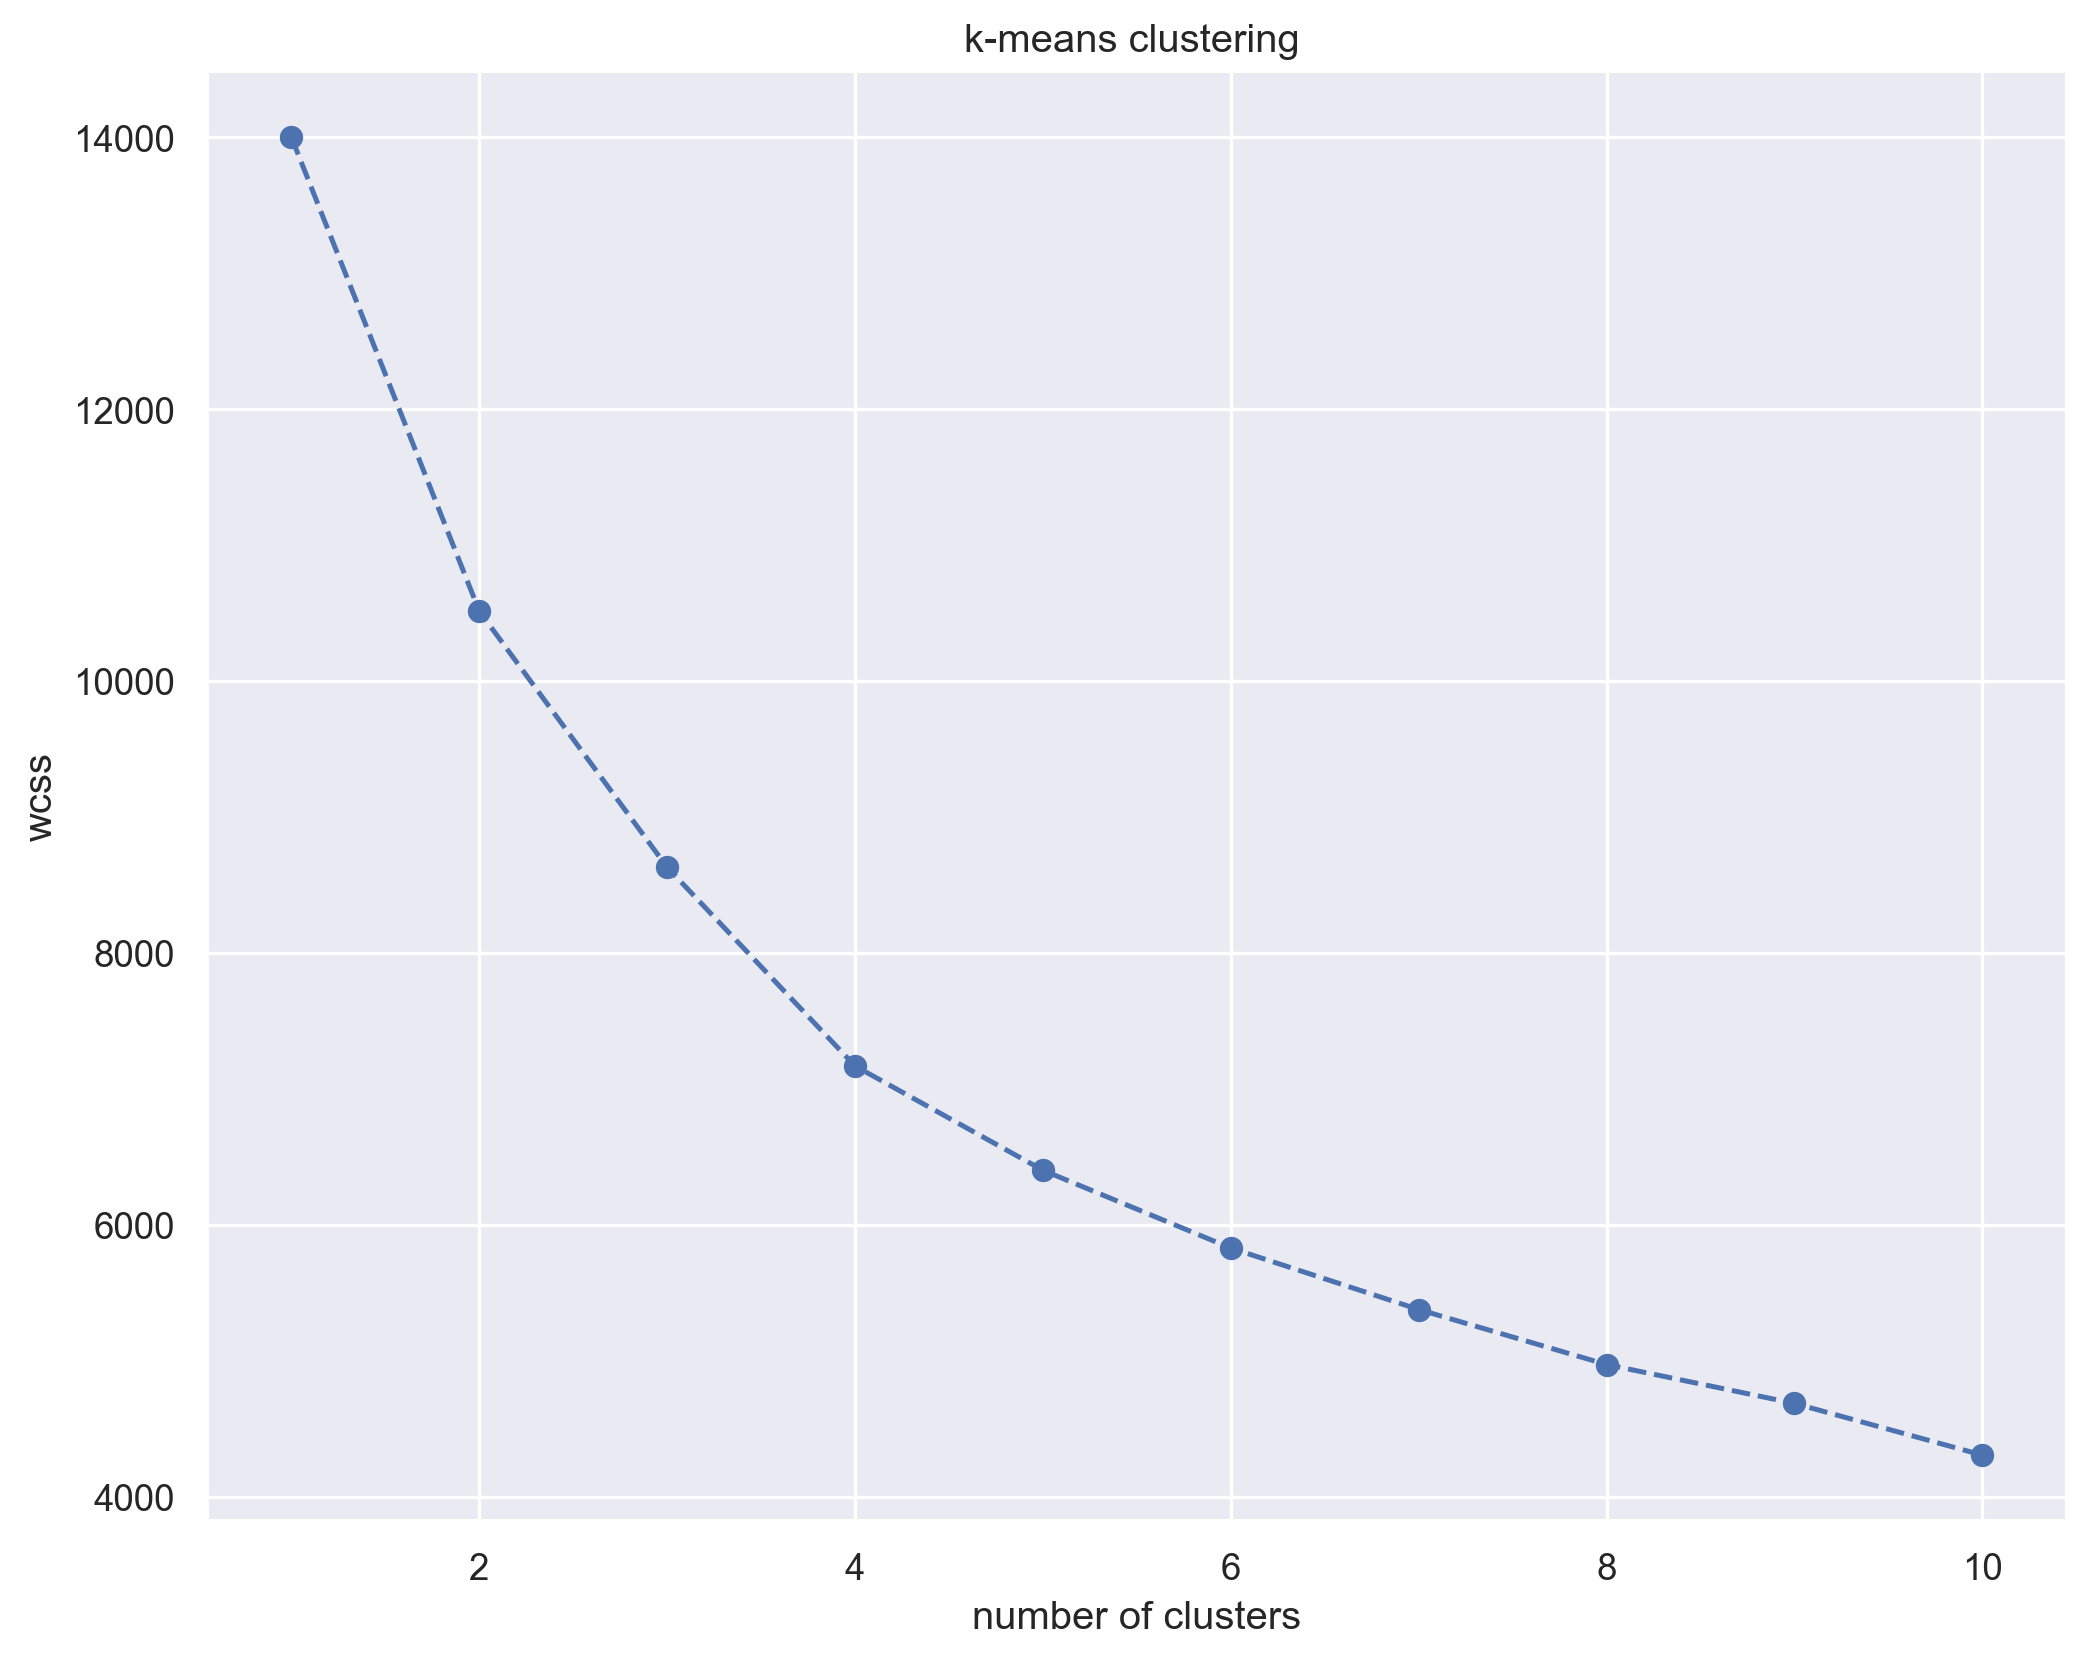

In [62]:
plt.figure(figsize =(10,8))
plt.plot(range(1,11),wcss,marker = 'o',linestyle = '--')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('k-means clustering ')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 4,init ='k-means++',random_state=42)


In [64]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

# Results

In [65]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [66]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [67]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [68]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [69]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [70]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

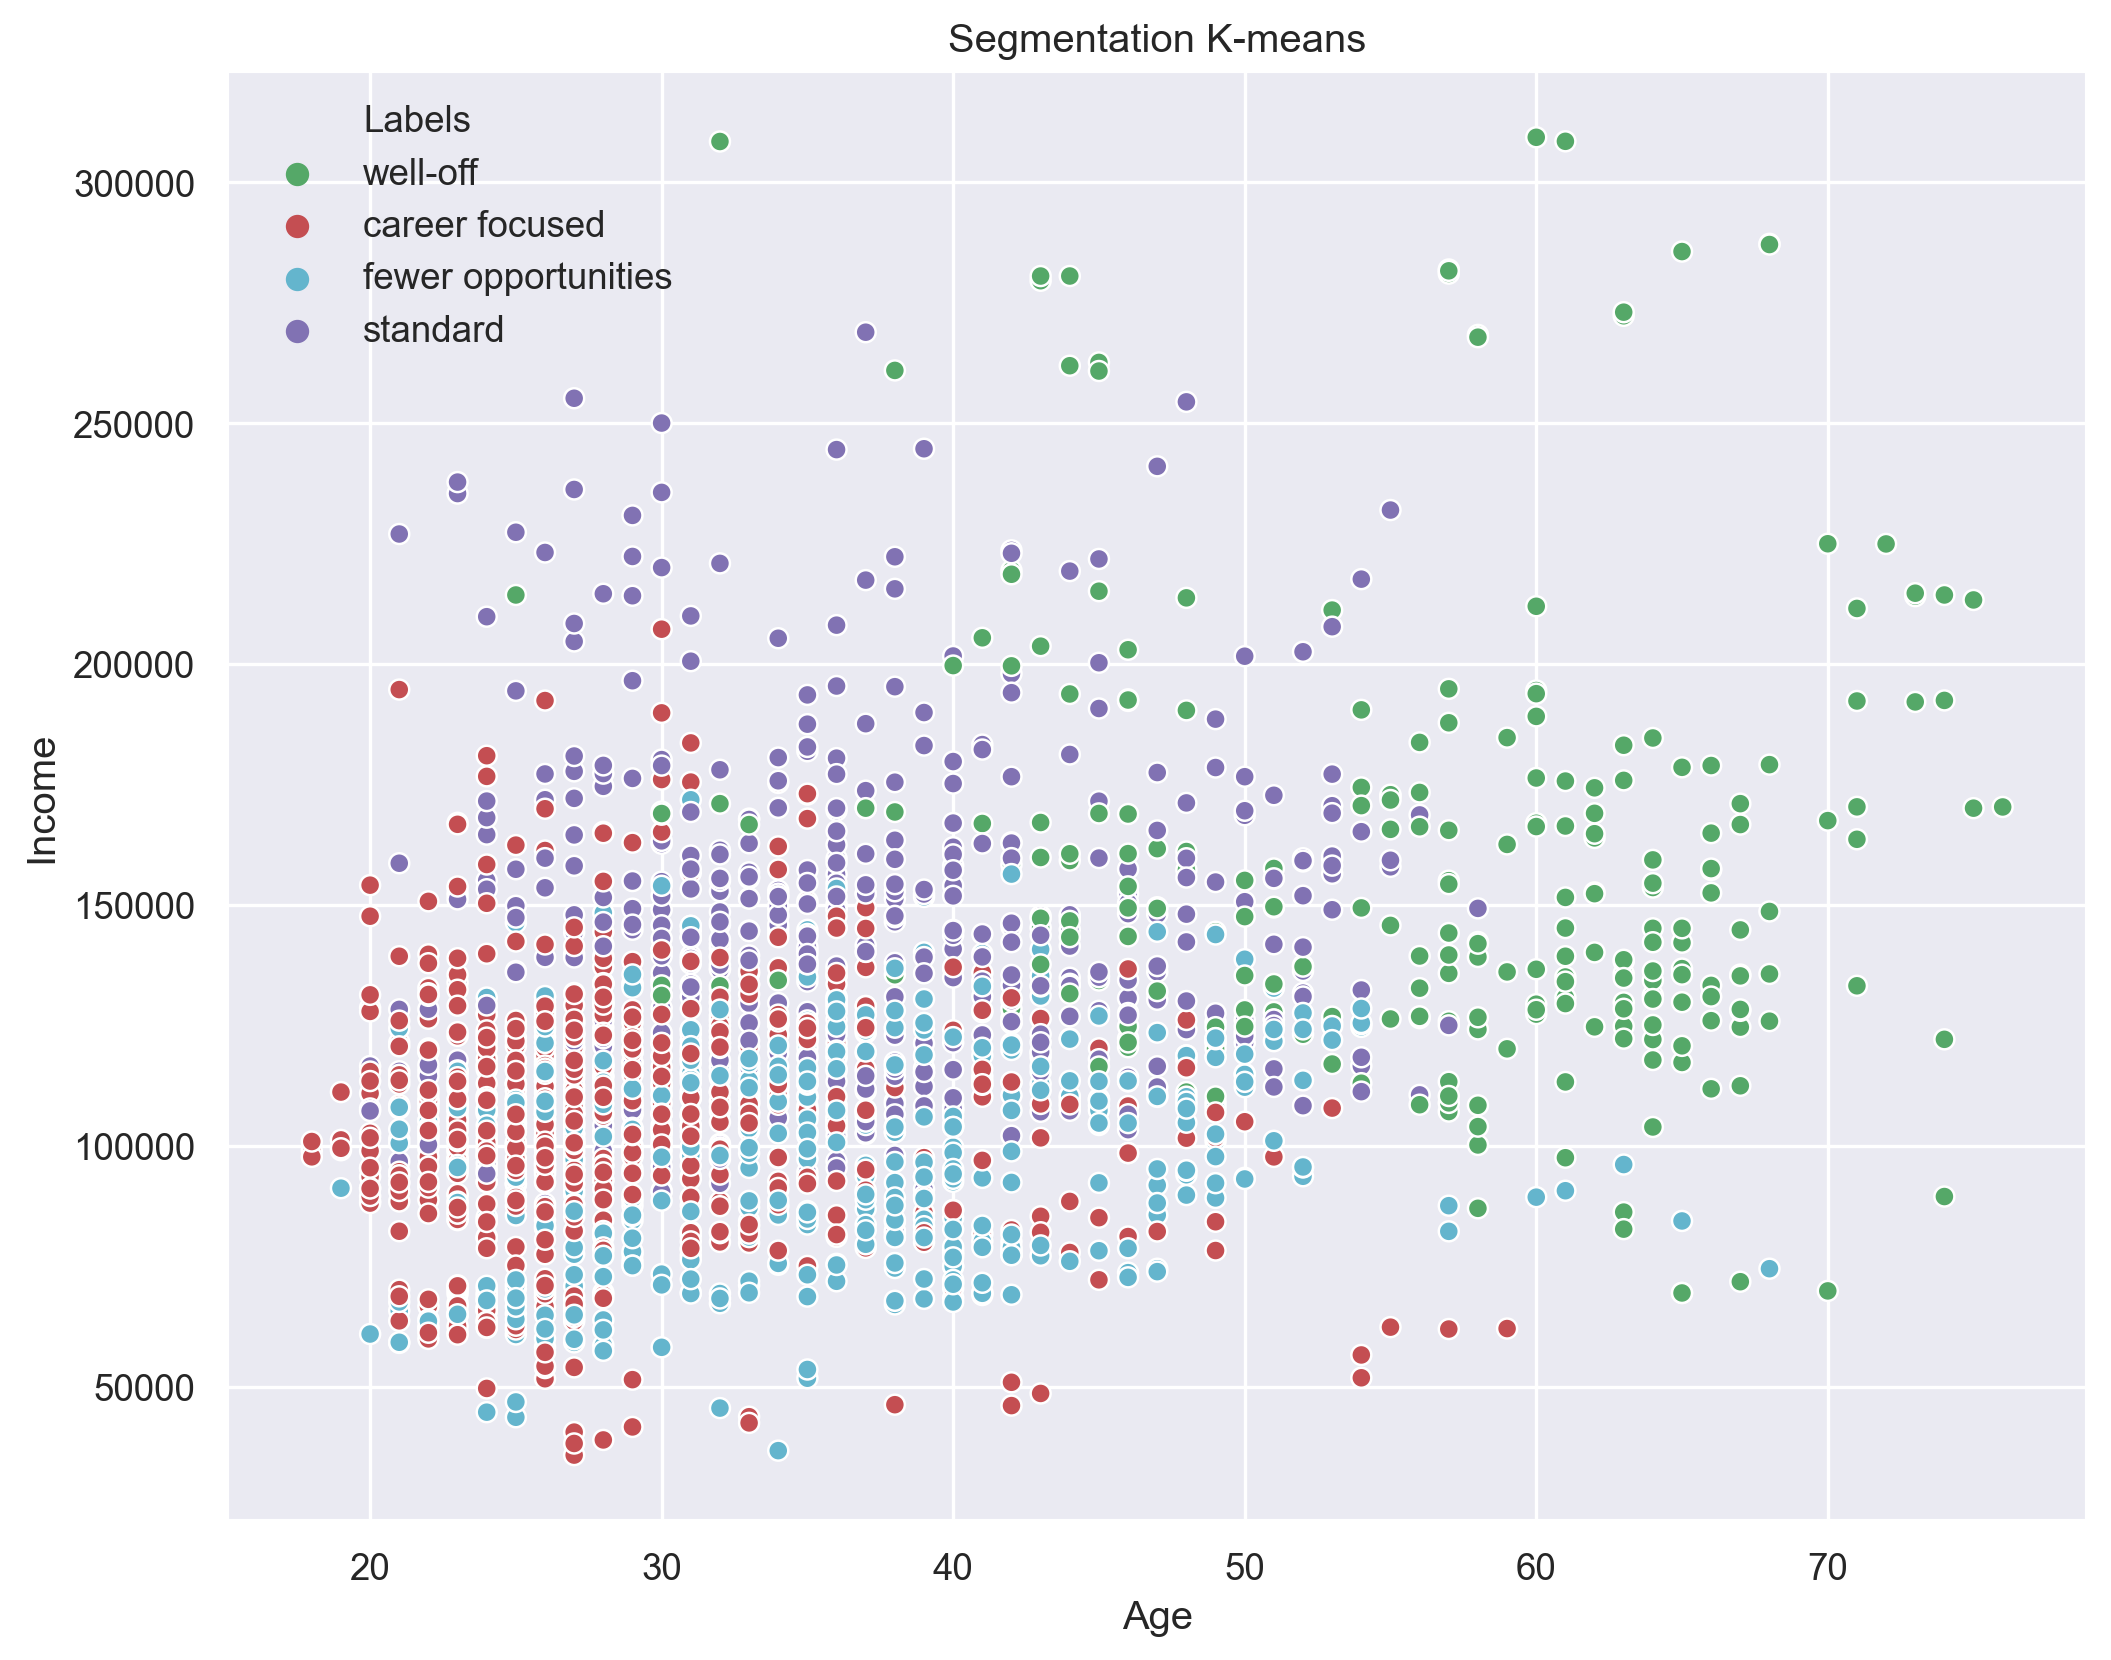

In [71]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# PCA

In [72]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [73]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Explained')

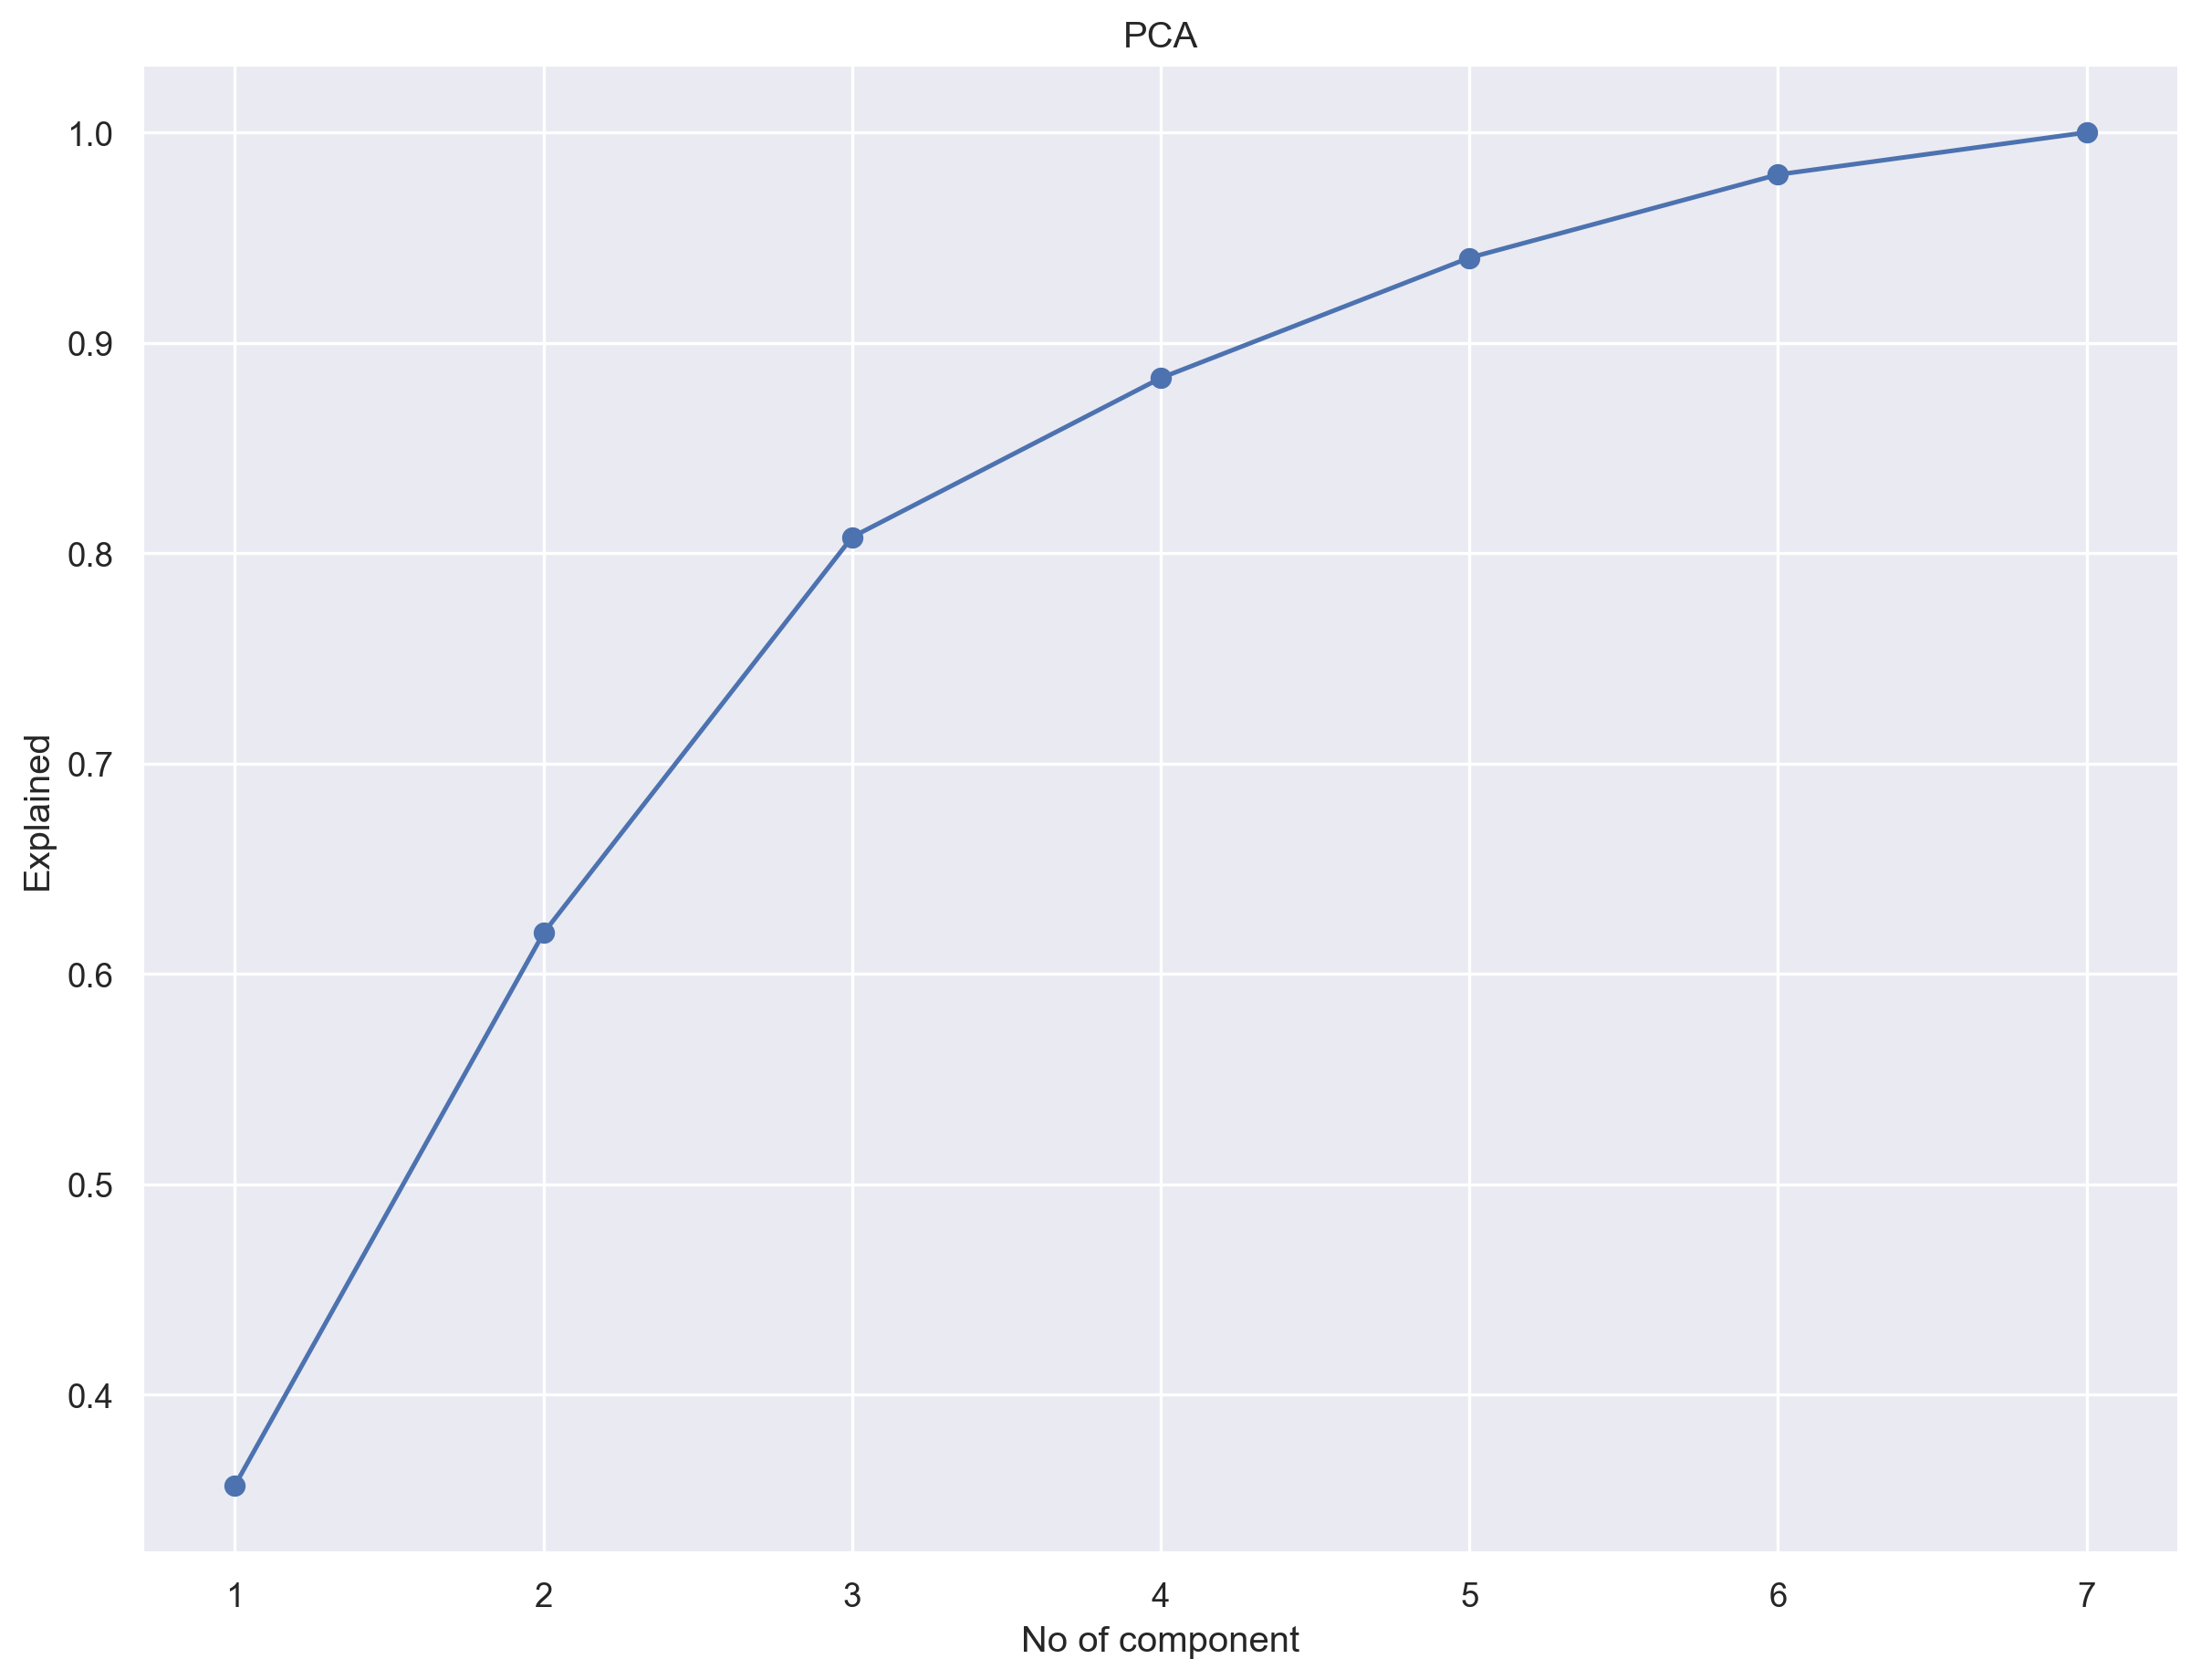

In [74]:
plt.figure(figsize =(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker ='o',linestyle ='-')
plt.title('PCA')
plt.xlabel('No of component')
plt.ylabel('Explained')

In [75]:
pca =PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

# pca Results

In [76]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [77]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df.columns.values,
                           index =['Comp 1','Comp 2','Comp 3']
                         )
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Comp 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Comp 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Comp 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x2a834d4c280>,
 [Text(0, 0.5, 'comp 1'), Text(0, 1.5, 'comp 2'), Text(0, 2.5, 'comp 3')])

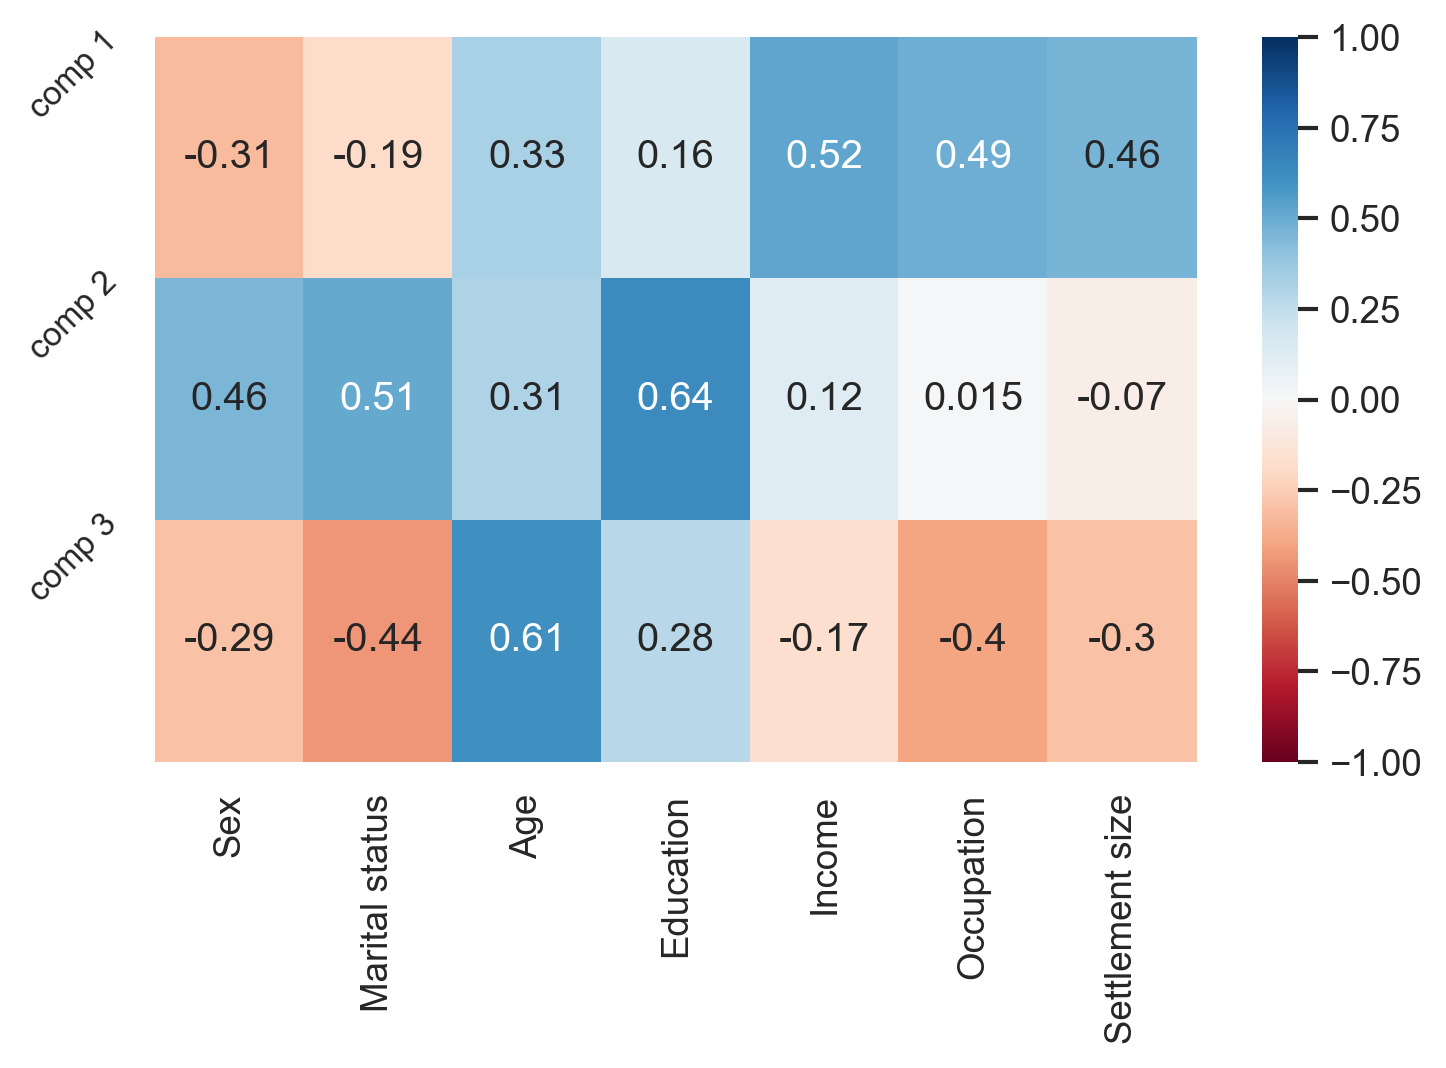

In [78]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap ='RdBu',
           annot = True)
plt.yticks([0,1,2],
          ['comp 1' ,'comp 2','comp 3'],
          rotation = 45,
          fontsize = 10)

In [79]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [80]:
scores_pca = pca.transform(segmentation_std)

# K-Means clustering with pca

In [81]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,init= 'k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    

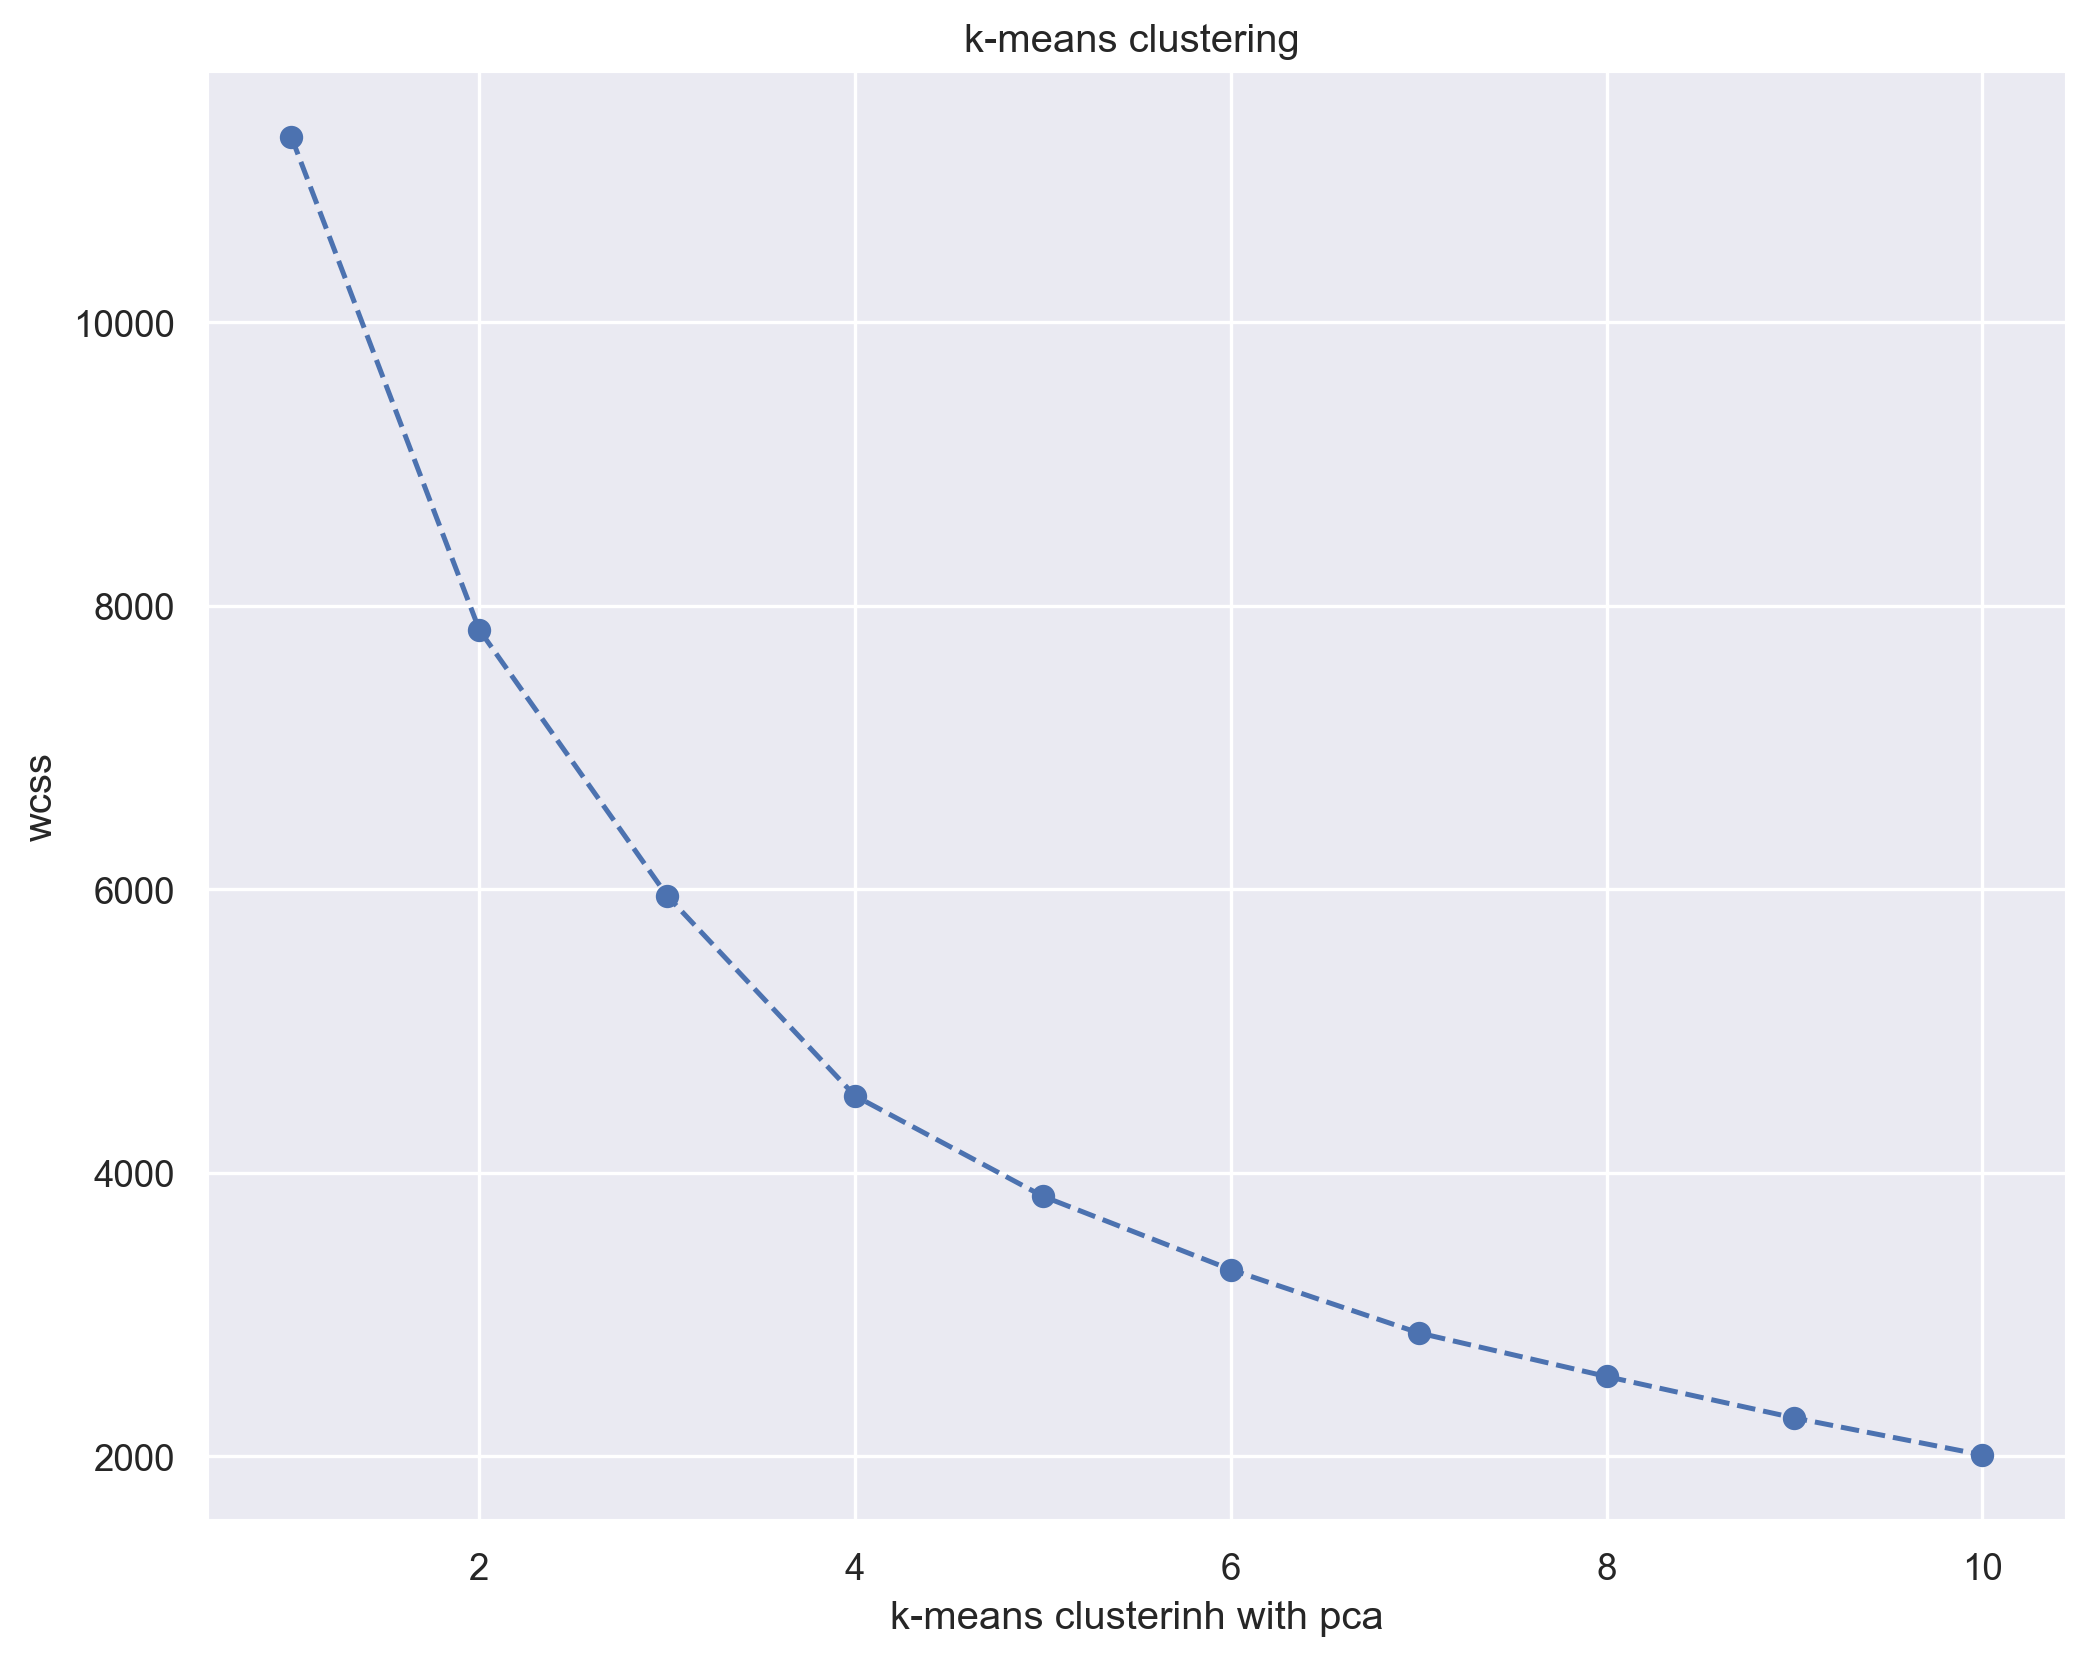

In [82]:
plt.figure(figsize =(10,8))
plt.plot(range(1,11),wcss,marker = 'o',linestyle = '--')
plt.xlabel('k-means clusterinh with pca')
plt.ylabel('wcss')
plt.title('k-means clustering ')
plt.show()

In [83]:
kmeans_pca = KMeans(n_clusters= 4,init='k-means++',random_state= 42)

In [84]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [88]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True),
                               pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['comp1','comp2','comp3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [89]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,comp1,comp2,comp3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [90]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,comp1,comp2,comp3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [91]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,comp1,comp2,comp3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
fewer opportunities,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [92]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

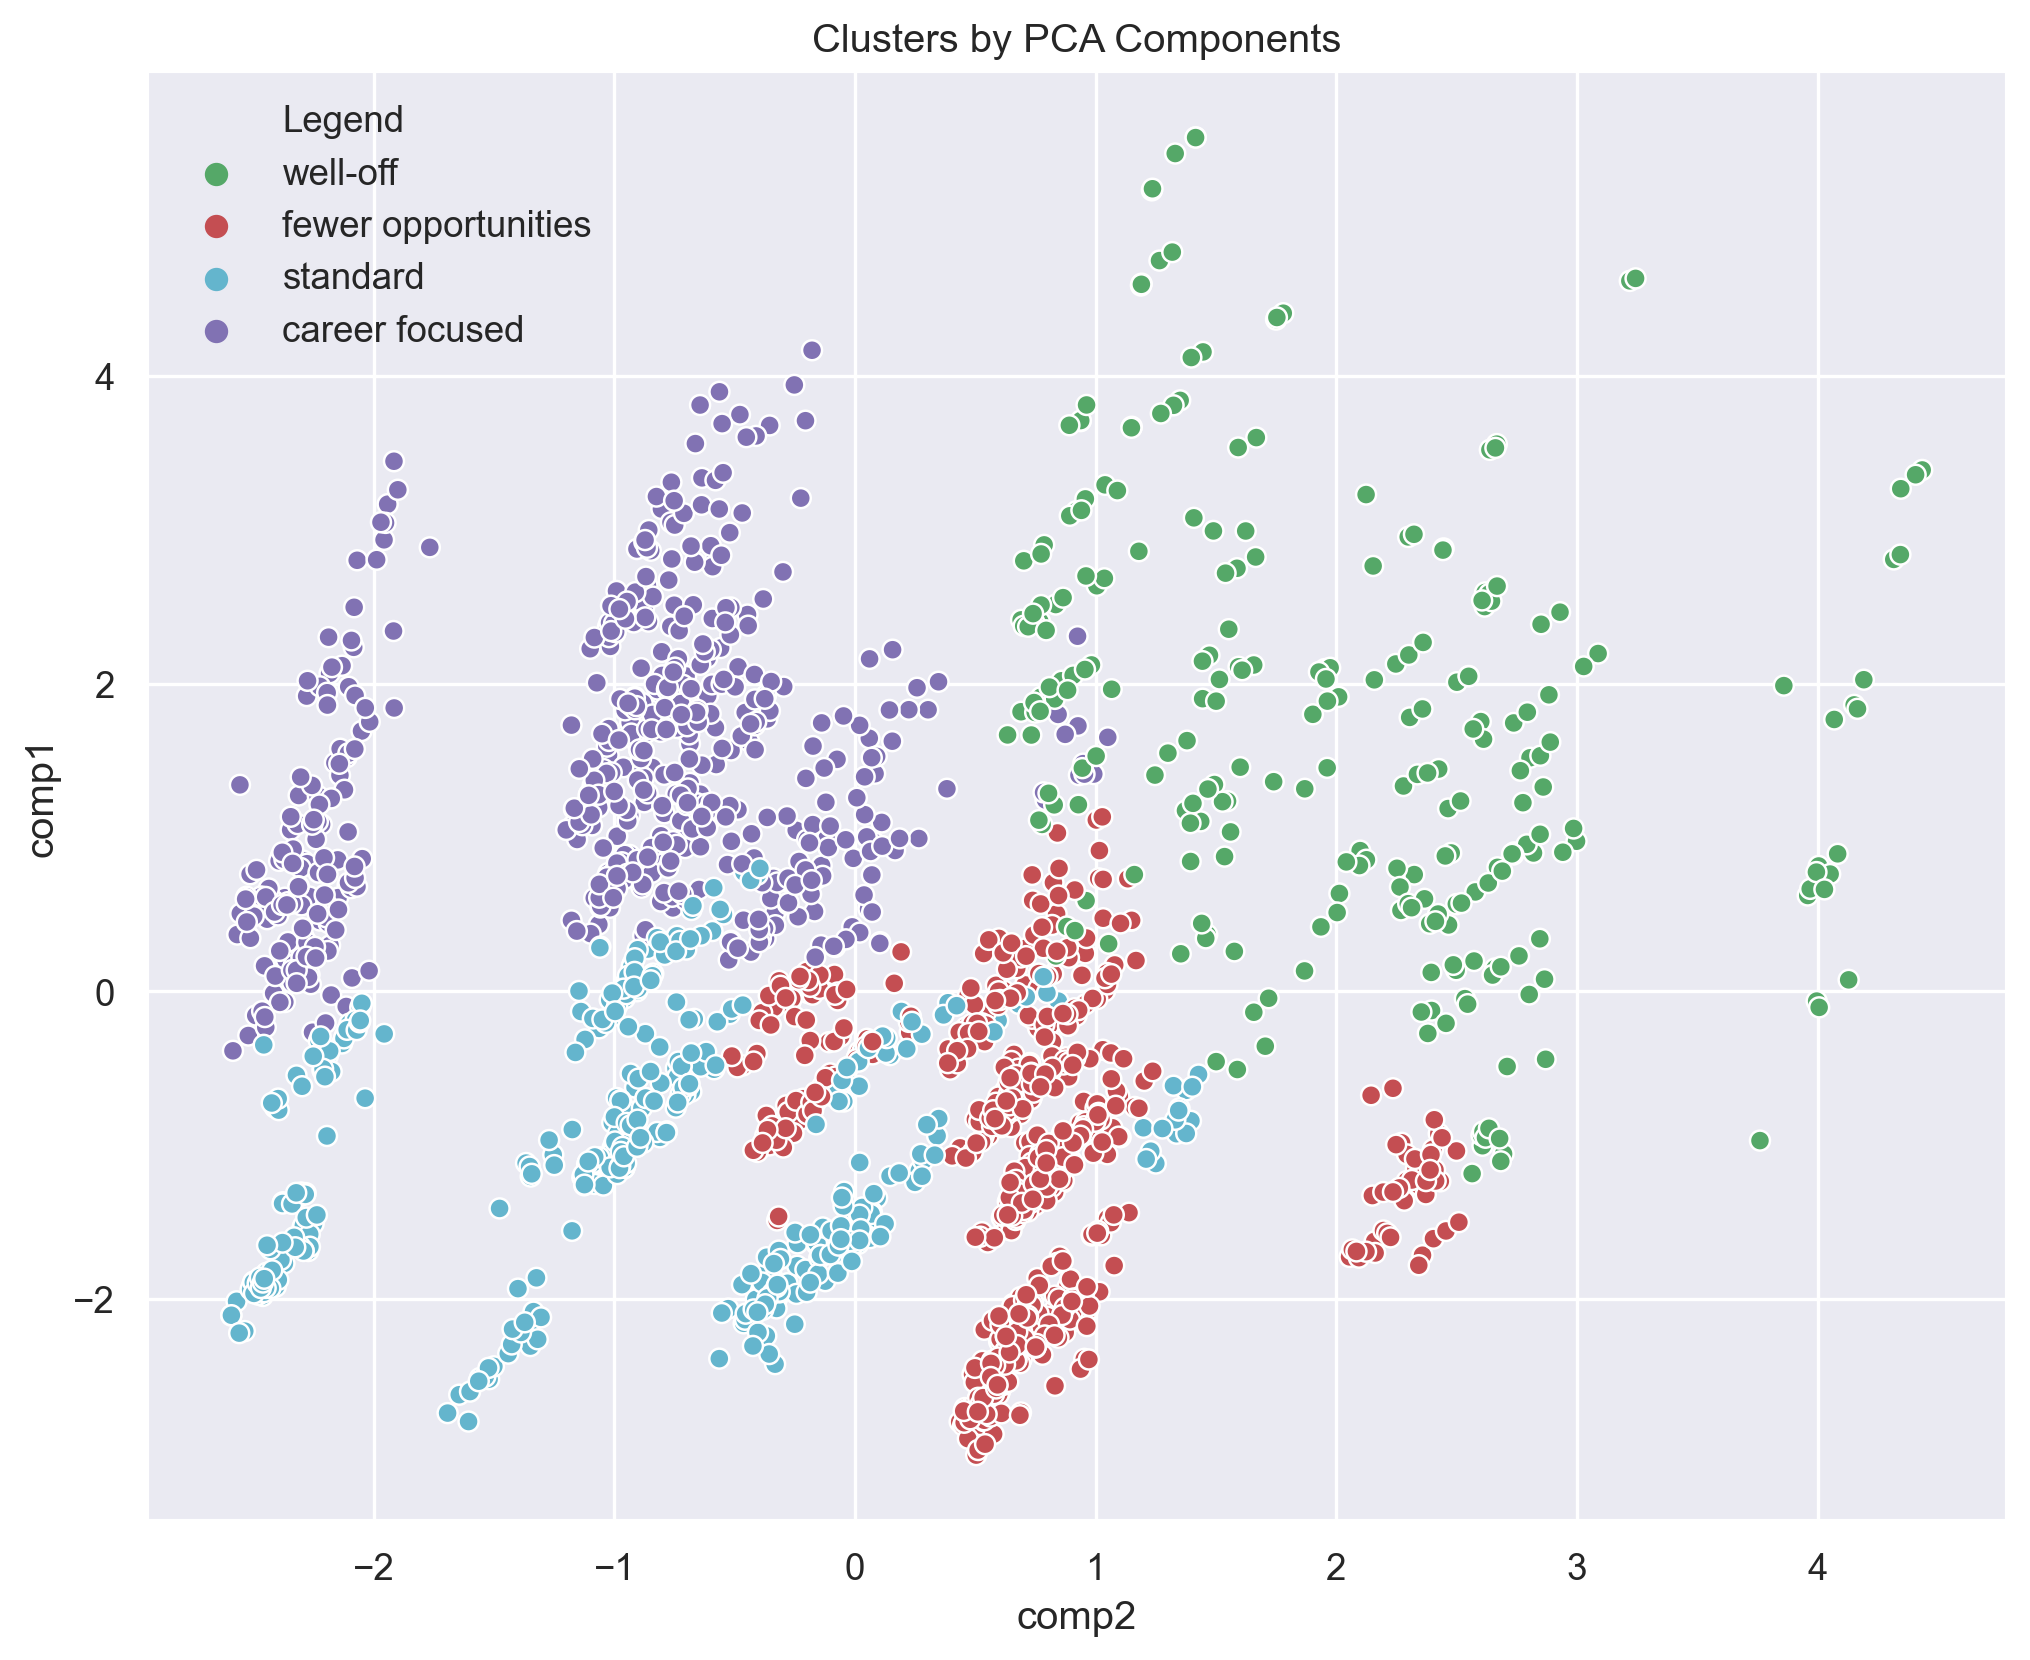

In [95]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['comp2']
y_axis = df_segm_pca_kmeans['comp1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

# Data Export

In [99]:
pickle.dump(scaler,open('scaler.pickle','wb'))
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))
